# Lab 5: Ensemble Machine Learning – Wine Dataset
**Author:** Eric Meyer

**Date:** 04/09/2025  

**Objective:**

## Section 1: Import and Inspect the Data

In [1]:
# Imports
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.ensemble import (
    RandomForestClassifier,
    AdaBoostClassifier,
    GradientBoostingClassifier,
    BaggingClassifier,
    VotingClassifier,
)
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
)

In [8]:
# Load the wine quality dataset
df = pd.read_csv("winequality-red.csv", sep=";")

# Display basic structure

df.info()
print
df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


## Section 2: Data Exploration and Preparation

### 2.1 Handle Missing Values and Clean Data

In [9]:
# Convert quality score to labels: low, medium, high
def quality_to_label(q):
    if q <= 4:
        return "low"
    elif q <= 6:
        return "medium"
    else:
        return "high"

df["quality_label"] = df["quality"].apply(quality_to_label)

In [10]:
# Convert quality score to numeric class: 0 = low, 1 = medium, 2 = high
def quality_to_number(q):
    if q <= 4:
        return 0
    elif q <= 6:
        return 1
    else:
        return 2

df["quality_numeric"] = df["quality"].apply(quality_to_number)

# Display updated DataFrame
print("\nUpdated Dataset Sample:")
print(df[["quality", "quality_label", "quality_numeric"]].head())


Updated Dataset Sample:
   quality quality_label  quality_numeric
0        5        medium                1
1        5        medium                1
2        5        medium                1
3        6        medium                1
4        5        medium                1


## Section 3: Feature Selection and Justification

In [11]:
# Input features: all except target and label columns
X = df.drop(columns=["quality", "quality_label", "quality_numeric"])
y = df["quality_numeric"]

# Explanation:
# We removed the original quality score and the text label to focus on a numeric target (0, 1, 2).
# Features are physicochemical properties such as acidity, alcohol, pH, etc.

## Section 4: Split the Data into Train and Test

In [12]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

## Section 5: Evaluate Model Performance - Random Forest (100) and Gradient Boosting (100)

In [13]:
# Define helper function to train and evaluate models
def evaluate_model(name, model, X_train, y_train, X_test, y_test, results):
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)
    train_f1 = f1_score(y_train, y_train_pred, average="weighted")
    test_f1 = f1_score(y_test, y_test_pred, average="weighted")

    print(f"\n{name} Results")
    print("Confusion Matrix (Test):")
    print(confusion_matrix(y_test, y_test_pred))
    print(f"Train Accuracy: {train_acc:.4f}, Test Accuracy: {test_acc:.4f}")
    print(f"Train F1 Score: {train_f1:.4f}, Test F1 Score: {test_f1:.4f}")

    results.append(
        {
            "Model": name,
            "Train Accuracy": train_acc,
            "Test Accuracy": test_acc,
            "Train F1": train_f1,
            "Test F1": test_f1,
            "Accuracy Gap": train_acc - test_acc,
            "F1 Score Gap": train_f1 - test_f1,
        }
    )

# Evaluate two ensemble models
results = []

In [14]:
# Random Forest (100)
evaluate_model(
    "Random Forest (100)",
    RandomForestClassifier(n_estimators=100, random_state=42),
    X_train,
    y_train,
    X_test,
    y_test,
    results,
)


Random Forest (100) Results
Confusion Matrix (Test):
[[  0  13   0]
 [  0 256   8]
 [  0  15  28]]
Train Accuracy: 1.0000, Test Accuracy: 0.8875
Train F1 Score: 1.0000, Test F1 Score: 0.8661


In [15]:
# Gradient Boosting (100)
evaluate_model(
    "Gradient Boosting (100)",
    GradientBoostingClassifier(
        n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42
    ),
    X_train,
    y_train,
    X_test,
    y_test,
    results,
)


Gradient Boosting (100) Results
Confusion Matrix (Test):
[[  0  13   0]
 [  3 247  14]
 [  0  16  27]]
Train Accuracy: 0.9601, Test Accuracy: 0.8562
Train F1 Score: 0.9584, Test F1 Score: 0.8411


### 5.4 Compare All Models (Case 4 - Best Case)

In [17]:
def report(name, y_true, y_pred):
    print(f"{name} R²: {r2_score(y_true, y_pred):.3f}")
    print(f"{name} RMSE: {np.sqrt(mean_squared_error(y_true, y_pred)):.2f}")
    print(f"{name} MAE: {mean_absolute_error(y_true, y_pred):.2f}\n")

report("Linear", y4_test, LinearRegression().fit(X4_train, y4_train).predict(X4_test))
report("Ridge", y4_test, y_pred_ridge)
report("ElasticNet", y4_test, y_pred_elastic)
report("Polynomial", y4_test, y_pred_poly)

Linear R²: 0.317
Linear RMSE: 31.44
Linear MAE: 20.70

Ridge R²: 0.317
Ridge RMSE: 31.43
Ridge MAE: 20.69

ElasticNet R²: 0.352
ElasticNet RMSE: 30.61
ElasticNet MAE: 19.61

Polynomial R²: 0.346
Polynomial RMSE: 30.76
Polynomial MAE: 18.52



#### 5.4 Reflections:

- **What patterns does the cubic model seem to capture:**
  - The cubic model captures slight curves and changes in fare across different age groups, especially mid-age ranges.

- **Where does it perform well or poorly:**
  - It performs well in areas with more data density (middle age), but poorly at the extremes (very young or old), where outliers may skew predictions.

- **Did the polynomial fit outperform linear regression:**
  - Yes, the polynomial model had slightly better R² and lower error metrics than the linear model.

- **Where (on the graph or among which kinds of data points) does it fit best:**
  - It fits best around common age ranges (20–40 years old), where more training examples provide stable patterns.

#### 5.5 Visualize Higher Order Polynomial (for the same 1 input case -- degree 6)

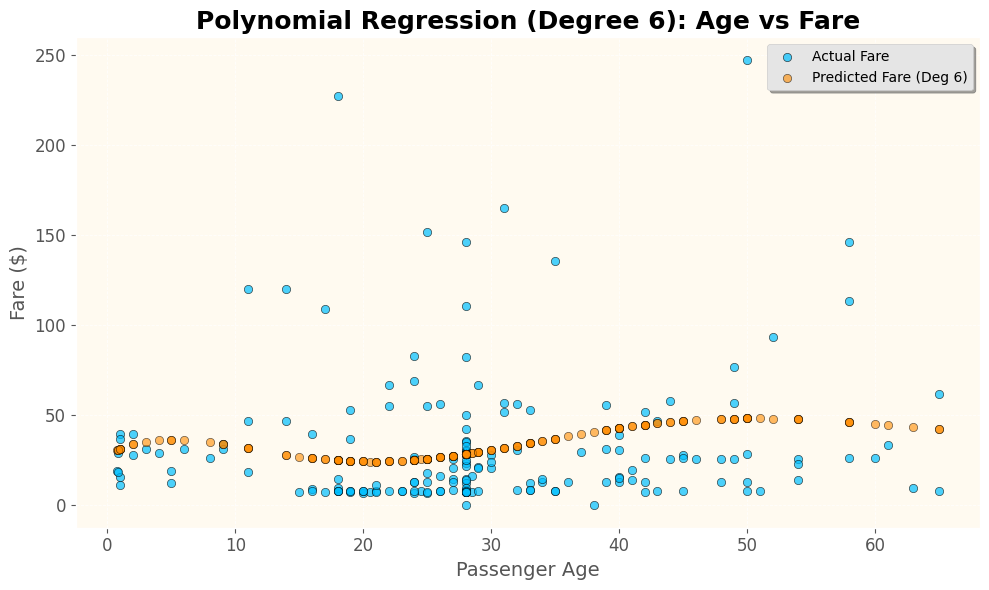

In [22]:
# Create Polynomial Features with degree 6
poly6 = PolynomialFeatures(degree=6)
X1_train_poly6 = poly6.fit_transform(X1_train)
X1_test_poly6 = poly6.transform(X1_test)

# Train model
poly6_model = LinearRegression().fit(X1_train_poly6, y1_train)
y_pred_poly6 = poly6_model.predict(X1_test_poly6)

# Plotting
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(10, 6))

# Scatter points
ax.scatter(X1_test, y1_test, color='#00BFFF', edgecolor='black', alpha=0.7, label='Actual Fare')
ax.scatter(X1_test, y_pred_poly6, color='#FF8C00', edgecolor='black', alpha=0.6, label='Predicted Fare (Deg 6)')

# Labels & title
ax.set_title("Polynomial Regression (Degree 6): Age vs Fare", fontsize=18, fontweight='bold')
ax.set_xlabel("Passenger Age", fontsize=14)
ax.set_ylabel("Fare ($)", fontsize=14)
ax.legend(frameon=True, fancybox=True, shadow=True)
ax.set_facecolor('#fffaf0')
ax.grid(True, linestyle='--', linewidth=0.6, alpha=0.8)
ax.tick_params(axis='both', labelsize=12)

plt.tight_layout()
plt.show()

### 6.1 Summarize Findings

- **What features are most useful:**
  - Pclass and age together were the most predictive features. Pclass especially helped separate fare ranges clearly.

- **What regression model performed best?**
  - ElasticNet performed best overall, with the highest R² and lower error values.
  
- **How did model complexity or regularization affect results?**
  - Higher-order polynomial models slightly improved accuracy but risked overfitting. Regularization (Ridge/ElasticNet) balanced the model, reducing overfitting and handling noise better.

### 6.2 Discuss Challenges Faces

- **Was fare hard to predict. Why?**
  - Yes — fare had high variance and was influenced by many unobserved factors like cabin quality or ticket groupings, which weren’t in the dataset.

- **Did skew or outliers impact the models?**
  - Definitely. A few extreme fares skewed predictions and error metrics, especially for simpler models.